## استفاده از Pandas در R  
برای حل موارد استفاده از pandas در R، باید از کتابخانه dplyr استفاده کنیم. ابتدا با وارد کردن کتابخانه‌های معمول علوم داده شروع می‌کنیم.  


In [28]:
options(warn=-1)
library(dplyr)
library(tidyverse)
library(lubridate)
library(zoo)
library(xts)
library('ggplot2')

سری شبیه به یک لیست یا آرایه یک‌بعدی است، اما با اندیس. تمام عملیات‌ها بر اساس اندیس هماهنگ هستند. برای اندیس‌دهی به سطرها در R باید از row.names استفاده کنیم.


In [29]:
a<- 1:9

In [30]:
b = c("I","like","to","use","Python","and","Pandas","very","much")

In [31]:
a1 = length(a)
b1 = length(b)

In [32]:
a = data.frame(a,row.names = c(1:a1))
print(a)

  a
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9


In [33]:
b = data.frame(b,row.names = c(1:b1))
print(b)

       b
1      I
2   like
3     to
4    use
5 Python
6    and
7 Pandas
8   very
9   much


یکی از کاربردهای رایج سری‌ها، سری‌های زمانی است. در سری‌های زمانی، ایندکس ساختار خاصی دارد - معمولاً یک بازه از تاریخ‌ها یا زمان‌ها. ساده‌ترین راه برای ایجاد سری‌های زمانی استفاده از تابع ts است. اما ما قصد داریم روش دیگری برای پیاده‌سازی سری‌های زمانی امتحان کنیم. برای این کار باید از کتابخانه lubridate استفاده کنیم تا با استفاده از تابع seq یک ایندکس از تاریخ‌ها ایجاد کنیم.

فرض کنید یک سری داریم که مقدار محصول خریداری‌شده در هر روز را نشان می‌دهد و می‌دانیم که هر یکشنبه باید یک مورد اضافی نیز برای خودمان برداریم. در اینجا نحوه مدل‌سازی با استفاده از سری‌ها آورده شده است:


In [34]:
# We will use ggplot2 for visualizing the data
# If you want to change the plot size repr library will be used
library(repr)
options(repr.plot.width = 12,repr.plot.height=6)

[1] "length of index is  366"


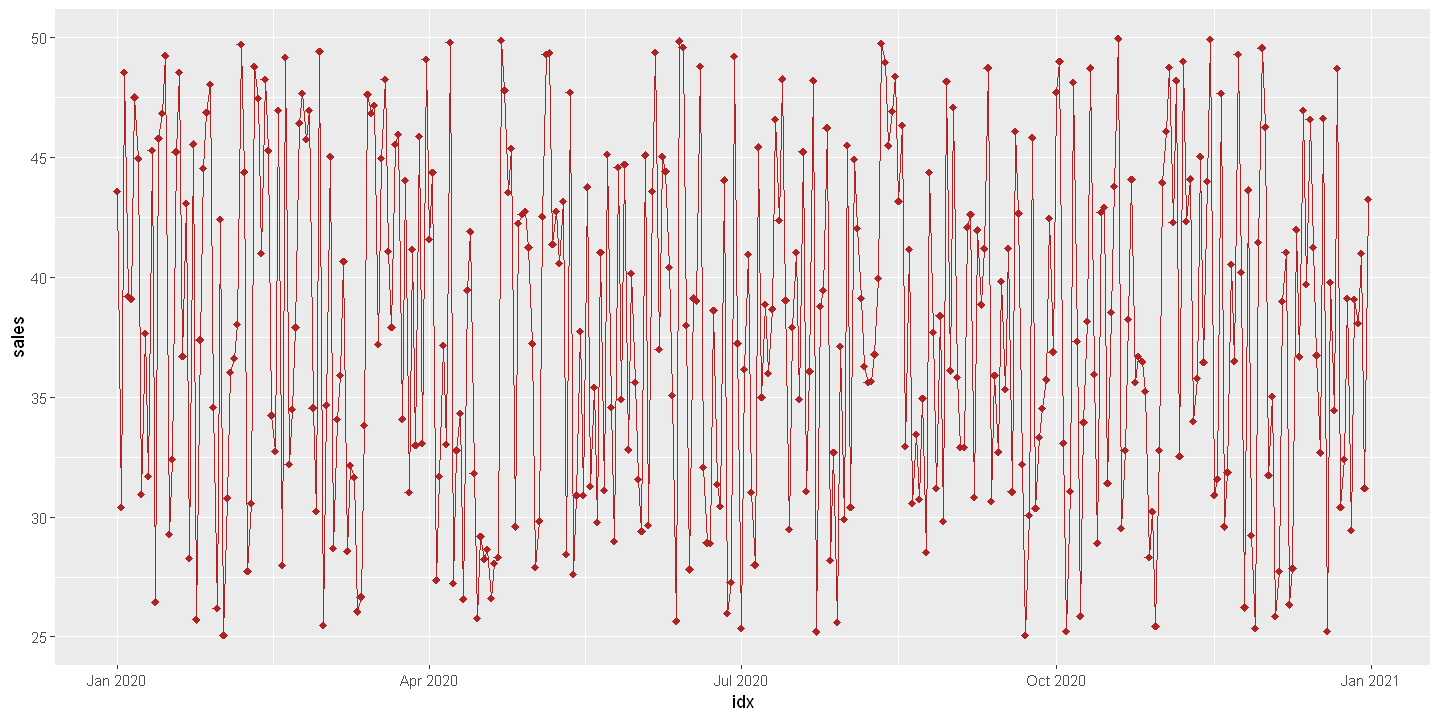

In [35]:
start_date <- mdy("Jan 1, 2020")
end_date <- mdy("Dec 31, 2020")
idx = seq(start_date,end_date,by ='day')
print(paste("length of index is ",length(idx)))
size = length(idx)
sales = runif(366,min=25,max=50)
sold_items <- data.frame(row.names=idx[0:size],sales)
ggplot(sold_items,aes(x=idx,y=sales)) + geom_point(color = "firebrick", shape = "diamond", size = 2) +
    geom_line(color = "firebrick", size = .3)

ما در حال ترکیب additional_items و sold_items هستیم تا بتوانیم تعداد کل محصولات را پیدا کنیم.  
همانطور که می‌بینید، در اینجا برای پیدا کردن مجموع با مشکل مواجه هستیم، زیرا مقدار NaN دریافت می‌کنیم. در سری هفتگی، روزهایی که ذکر نشده‌اند به عنوان مقادیر گم‌شده (NaN) در نظر گرفته می‌شوند. اگر NaN را به یک عدد اضافه کنیم، نتیجه NaN خواهد بود.  
برای انجام جمع، باید NaN را با 0 جایگزین کنیم.  


In [36]:
index = seq(start_date,end_date,by = 'week')
sz = length(index)
additional_product <- rep(10,53)
additional_items  <- data.frame(row.names = index[0:sz],additional_product)
additional_items
# we are merging two dataframe so that we can add
additional_item = merge(additional_items,sold_items, by = 0, all = TRUE)[-1] 
total  = data.frame(row.names=idx[0:size],additional_item$additional_product + additional_item$sales)
colnames(total) =  c('total')
total

additional_product
2020-01-01 10                
2020-01-08 10                
2020-01-15 10                
2020-01-22 10                
2020-01-29 10                
2020-02-05 10                
2020-02-12 10                
2020-02-19 10                
2020-02-26 10                
2020-03-04 10                
2020-03-11 10                
2020-03-18 10                
2020-03-25 10                
2020-04-01 10                
2020-04-08 10                
2020-04-15 10                
2020-04-22 10                
2020-04-29 10                
2020-05-06 10                
2020-05-13 10                
2020-05-20 10                
2020-05-27 10                
2020-06-03 10                
2020-06-10 10                
2020-06-17 10                
2020-06-24 10                
2020-07-01 10                
2020-07-08 10                
2020-07-15 10                
2020-07-22 10                
2020-07-29 10                
2020-08-05 10                
2020-08-12 10                
2020-08-19 10                
2020-08-26 10                
2020-09-02 10                
2020-09-09 10                
2020-09-16 10                
2020-09-23 10                
2020-09-30 10                
2020-10-07 10                
2020-10-14 10                
2020-10-21 10                
2020-10-28 10                
2020-11-04 10                
2020-11-11 10                
2020-11-18 10                
2020-11-25 10                
2020-12-02 10                
2020-12-09 10                
2020-12-16 10                
2020-12-23 10                
2020-12-30 10

total   
2020-01-01 53.59979
2020-01-02       NA
2020-01-03       NA
2020-01-04       NA
2020-01-05       NA
2020-01-06       NA
2020-01-07       NA
2020-01-08 40.93455
2020-01-09       NA
2020-01-10       NA
2020-01-11       NA
2020-01-12       NA
2020-01-13       NA
2020-01-14       NA
2020-01-15 59.24704
2020-01-16       NA
2020-01-17       NA
2020-01-18       NA
2020-01-19       NA
2020-01-20       NA
2020-01-21       NA
2020-01-22 38.26416
2020-01-23       NA
2020-01-24       NA
2020-01-25       NA
2020-01-26       NA
2020-01-27       NA
2020-01-28       NA
2020-01-29 44.58327
2020-01-30       NA
...        ...     
2020-12-02 41.74811
2020-12-03       NA
2020-12-04       NA
2020-12-05       NA
2020-12-06       NA
2020-12-07       NA
2020-12-08       NA
2020-12-09 37.85650
2020-12-10       NA
2020-12-11       NA
2020-12-12       NA
2020-12-13       NA
2020-12-14       NA
2020-12-15       NA
2020-12-16 46.73560
2020-12-17       NA
2020-12-18       NA
2020-12-19       NA
2020-12-20       NA
2020-12-21       NA
2020-12-22       NA
2020-12-23 40.42143
2020-12-24       NA
2020-12-25       NA
2020-12-26       NA
2020-12-27       NA
2020-12-28       NA
2020-12-29       NA
2020-12-30 41.20298
2020-12-31       NA

In [37]:
additional_item[is.na(additional_item)] = 0
total  = data.frame(row.names=idx[0:size],additional_item$additional_product + additional_item$sales)
colnames(total) =  c('total')
total

total   
2020-01-01 53.59979
2020-01-02 30.41127
2020-01-03 48.54839
2020-01-04 39.20897
2020-01-05 39.09894
2020-01-06 47.53019
2020-01-07 44.94766
2020-01-08 40.93455
2020-01-09 37.66561
2020-01-10 31.68825
2020-01-11 45.30576
2020-01-12 26.45509
2020-01-13 45.81249
2020-01-14 46.84547
2020-01-15 59.24704
2020-01-16 29.28688
2020-01-17 32.41731
2020-01-18 45.23295
2020-01-19 48.54330
2020-01-20 36.69353
2020-01-21 43.09588
2020-01-22 38.26416
2020-01-23 45.56863
2020-01-24 25.70944
2020-01-25 37.38721
2020-01-26 44.53955
2020-01-27 46.88427
2020-01-28 48.05540
2020-01-29 44.58327
2020-01-30 26.19490
...        ...     
2020-12-02 41.74811
2020-12-03 35.03915
2020-12-04 25.84637
2020-12-05 27.73147
2020-12-06 39.00993
2020-12-07 41.03187
2020-12-08 26.33862
2020-12-09 37.85650
2020-12-10 41.98943
2020-12-11 36.68901
2020-12-12 46.96883
2020-12-13 39.70374
2020-12-14 46.59464
2020-12-15 41.24742
2020-12-16 46.73560
2020-12-17 32.68275
2020-12-18 46.64238
2020-12-19 25.22163
2020-12-20 39.79997
2020-12-21 34.45013
2020-12-22 48.71183
2020-12-23 40.42143
2020-12-24 32.41991
2020-12-25 39.12296
2020-12-26 29.43616
2020-12-27 39.09337
2020-12-28 38.09288
2020-12-29 41.00681
2020-12-30 41.20298
2020-12-31 43.25232

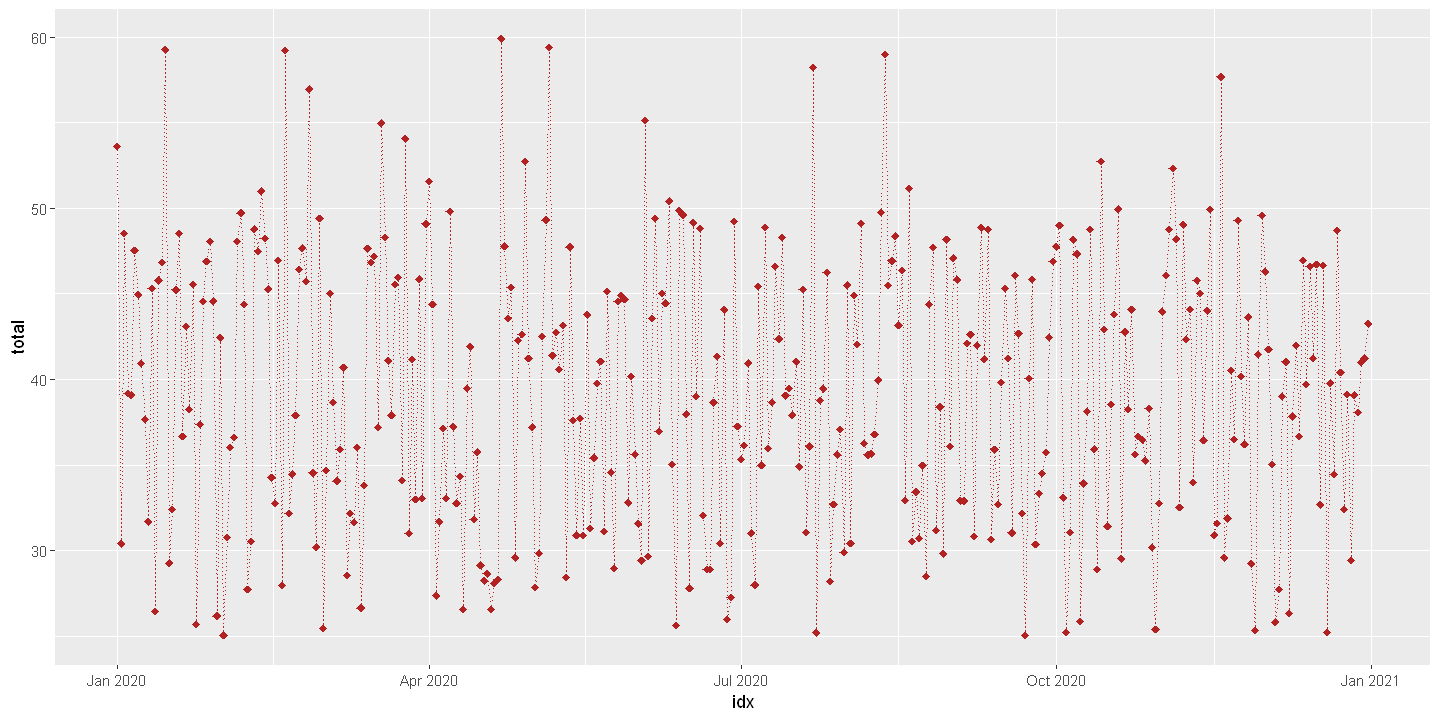

In [38]:
ggplot(total,aes(x=idx,y=total)) + geom_point(color = "firebrick", shape = "diamond", size = 2) +
    geom_line(color = "firebrick", linetype = "dotted", size = .3)

ما می‌خواهیم تعداد کل محصولات را به صورت ماهانه تحلیل کنیم. بنابراین، میانگین تعداد کل محصولات در یک ماه را پیدا می‌کنیم و یک نمودار میله‌ای رسم می‌کنیم.


In [39]:
index = seq(start_date,end_date,by ='month')


              total
2020-01-31 41.03847
2020-02-29 40.91568
2020-03-31 39.27424
2020-04-30 37.63589
2020-05-31 38.75129
2020-06-30 38.75744
2020-07-31 38.35212
2020-08-31 40.43712
2020-09-30 38.90043
2020-10-31 37.99855
2020-11-30 41.20759
2020-12-31 38.46355

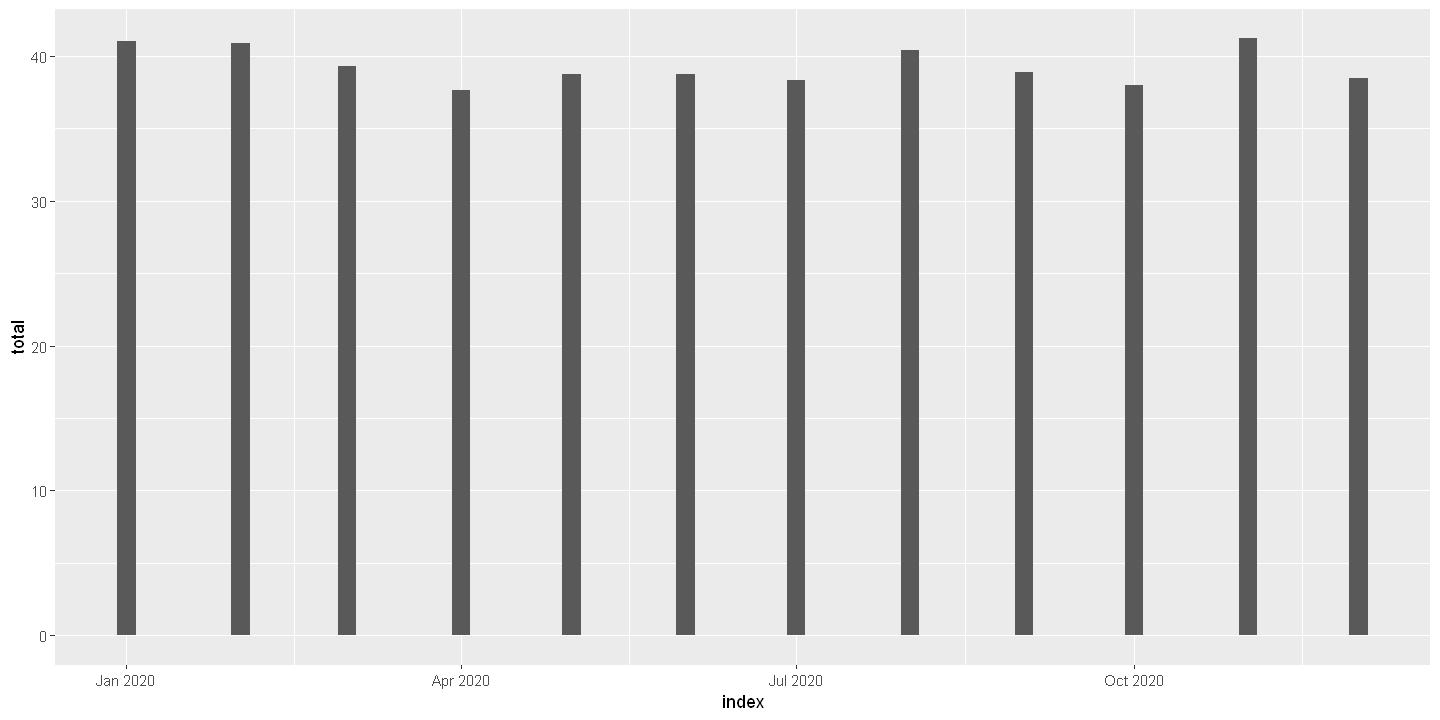

In [40]:
x<- as.xts(total, dateFormat ="Date")
(monthly<-apply.monthly(x,mean))
ggplot(monthly, aes(x=index, y=total)) + 
  geom_bar(stat = "identity", width=5) 

## دیتافریم
دیتافریم در اصل مجموعه‌ای از سری‌ها با یک ایندکس مشترک است. ما می‌توانیم چندین سری را با هم ترکیب کرده و یک دیتافریم بسازیم.  
برای مثال، ما در حال ساختن دیتافریمی از سری‌های a و b هستیم.


In [41]:
a = data.frame(a,row.names = c(1:a1))

In [42]:
b = data.frame(b,row.names = c(1:b1))

In [43]:
df<- data.frame(a,b)
df

a b     
1 1 I     
2 2 like  
3 3 to    
4 4 use   
5 5 Python
6 6 and   
7 7 Pandas
8 8 very  
9 9 much

ما همچنین می‌توانیم نام ستون را با استفاده از تابع تغییر نام تغییر دهیم


In [44]:
df = 
  rename(df,
    A = a,
    B = b,
  )

In [45]:
df

A B     
1 1 I     
2 2 like  
3 3 to    
4 4 use   
5 5 Python
6 6 and   
7 7 Pandas
8 8 very  
9 9 much

ما همچنین می‌توانیم یک ستون را در یک دیتافریم با استفاده از تابع select انتخاب کنیم


In [46]:
cat("Column A (series):\n")
select(df,'A')

Column A (series):


A
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9

ما ردیف‌هایی را استخراج خواهیم کرد که معیار منطقی خاصی را در سری‌ها برآورده کنند


In [47]:
df[df$A<5,]

A B   
1 1 I   
2 2 like
3 3 to  
4 4 use

In [48]:
df[df$A>5 & df$A<7,]

A B  
6 6 and

ایجاد ستون‌های جدید

کد زیر یک سری ایجاد می‌کند که انحراف مقدار a از مقدار میانگین آن را محاسبه کرده و سپس آن را با یک دیتافریم موجود ادغام می‌کند.


In [49]:
df$DivA <- df$A - mean(df$A)

In [50]:
df

A B      DivA
1 1 I      -4  
2 2 like   -3  
3 3 to     -2  
4 4 use    -1  
5 5 Python  0  
6 6 and     1  
7 7 Pandas  2  
8 8 very    3  
9 9 much    4

ما در حال ایجاد یک سری هستیم که طول رشته ستون A را محاسبه کرده و سپس آن را با دیتافریم موجود ادغام می‌کنیم.


In [51]:
df$LenB <- str_length(df$B)

In [52]:
df

A B      DivA LenB
1 1 I      -4   1   
2 2 like   -3   4   
3 3 to     -2   2   
4 4 use    -1   3   
5 5 Python  0   6   
6 6 and     1   3   
7 7 Pandas  2   6   
8 8 very    3   4   
9 9 much    4   4

انتخاب ردیف‌ها بر اساس اعداد


In [53]:
df[0:5,]

A B      DivA LenB
1 1 I      -4   1   
2 2 like   -3   4   
3 3 to     -2   2   
4 4 use    -1   3   
5 5 Python  0   6

***گروه‌بندی به معنای دسته‌بندی چندین ستون بر اساس شرایط خاص است و ما از تابع summarise برای مشاهده تفاوت‌ها استفاده خواهیم کرد***

فرض کنید می‌خواهیم مقدار میانگین ستون A را برای هر مقدار مشخص LenB محاسبه کنیم. در این صورت می‌توانیم DataFrame خود را بر اساس LenB گروه‌بندی کنیم و میانگین را پیدا کرده و آن را به عنوان a نام‌گذاری کنیم.


In [54]:
df1 = df %>% group_by(LenB) %>% summarise(a = mean(A))

In [55]:
df1

LenB a       
1 1    1.000000
2 2    3.000000
3 3    5.000000
4 4    6.333333
5 6    6.000000

In [56]:
df2 = df %>% group_by(LenB) %>%
summarise(MEAN = mean(A),count =length(DivA))

## چاپ و ترسیم  
وقتی که head(df) را فراخوانی می‌کنیم، دیتافریم را به صورت جدولی چاپ می‌کند.

اولین گام در هر پروژه علم داده، پاکسازی داده‌ها و بصری‌سازی آن‌ها است، بنابراین بصری‌سازی مجموعه داده و استخراج اطلاعات مفید از آن بسیار مهم است.


In [57]:
#dataset = read.csv("file name")

In [58]:
head(df)

A B      DivA LenB
1 1 I      -4   1   
2 2 like   -3   4   
3 3 to     -2   2   
4 4 use    -1   3   
5 5 Python  0   6   
6 6 and     1   3

ggplot2 یک کتابخانه بسیار خوب است زیرا ایجاد نمودارهای پیچیده از داده‌های موجود در یک data frame را ساده می‌کند.

این کتابخانه یک رابط برنامه‌نویسی ساختاریافته‌تر برای مشخص کردن اینکه چه متغیرهایی باید نمایش داده شوند، چگونه نمایش داده شوند و ویژگی‌های بصری کلی ارائه می‌دهد.


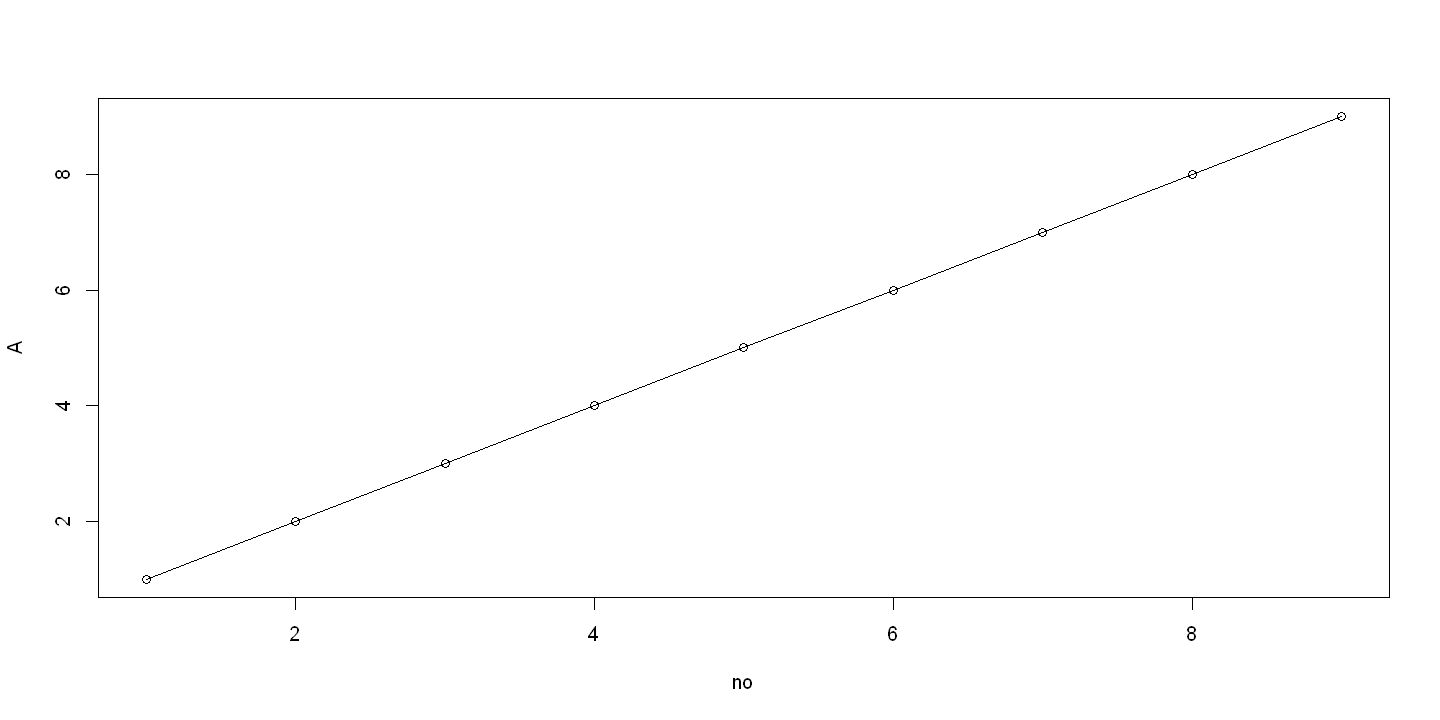

In [59]:
plot(df$A,type = 'o',xlab = "no",ylab = "A")

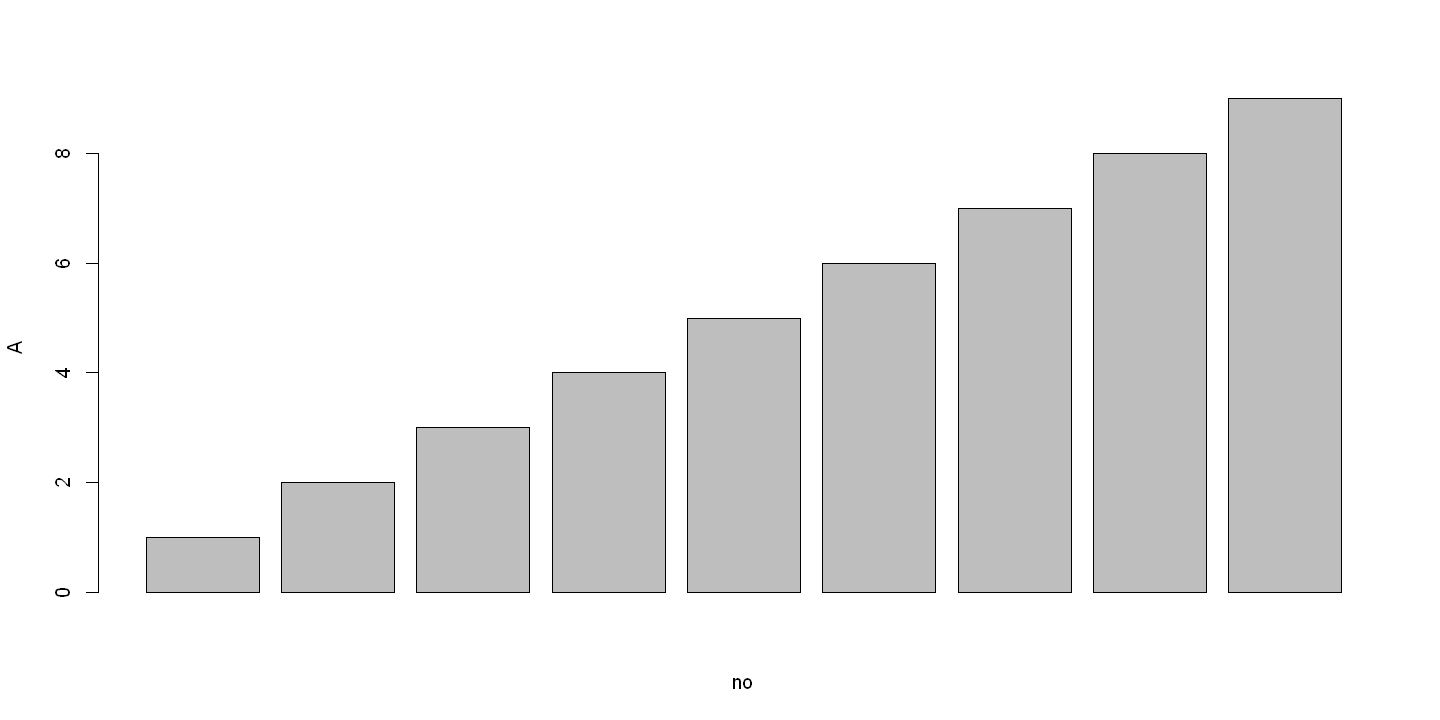

In [60]:
barplot(df$A, ylab = 'A',xlab = 'no')


---

**سلب مسئولیت**:  
این سند با استفاده از سرویس ترجمه هوش مصنوعی [Co-op Translator](https://github.com/Azure/co-op-translator) ترجمه شده است. در حالی که ما تلاش می‌کنیم دقت را حفظ کنیم، لطفاً توجه داشته باشید که ترجمه‌های خودکار ممکن است شامل خطاها یا نادرستی‌ها باشند. سند اصلی به زبان اصلی آن باید به عنوان منبع معتبر در نظر گرفته شود. برای اطلاعات حیاتی، ترجمه حرفه‌ای انسانی توصیه می‌شود. ما مسئولیتی در قبال سوء تفاهم‌ها یا تفسیرهای نادرست ناشی از استفاده از این ترجمه نداریم.
